# Neural Networks Vs Linear Models:

## 1. Linear Models Vs Neural Networks:

Linear models captures the linear relationship in a given dataset.

Linear models cannot solve many machine learning problems effectively. Even if we combine them into a **composite function**
$f_2(f_1(x))$, a composite function of linear functions remains linear. This is straightforward to verify.

Let's define $y_1=f_1(x)=a_1x$ and $y_2=f_1(x)=a_2x$, here $f_2$ depends on $f_1$ making it composite function. We can write $f_2$ as:

$y_2=a_2y1=a_2(a_1x)=a_2a_1x$

Since $a_2, a_1$ are constants, suppose $a_3=a_2a_1$ thus $y_2=a_3x$ which is can only capture the linear relation. 
To address this issue, we add non-linearity. For one dimensional input

$y=\phi(wx+b)$$$

The function $\phi$ is a fixed non-linear function, known as activation function. Common choices are:

## 2. Activation Functions

### i. RELU (Rectified Linear Unit):

$$RELU(z)=max(0,z)$$

**outputs non negative values.**
 
### ii. Sigmoid: 

$$\sigma(x)=\frac{1}{1+e^{-z}}$$

**Outputs values between 0 and 1, making it suitable for binary classification.**

### iii. Tanh(hyperbolic tangent)

$$tanh=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$

**Outputs value in between 1 and -1**

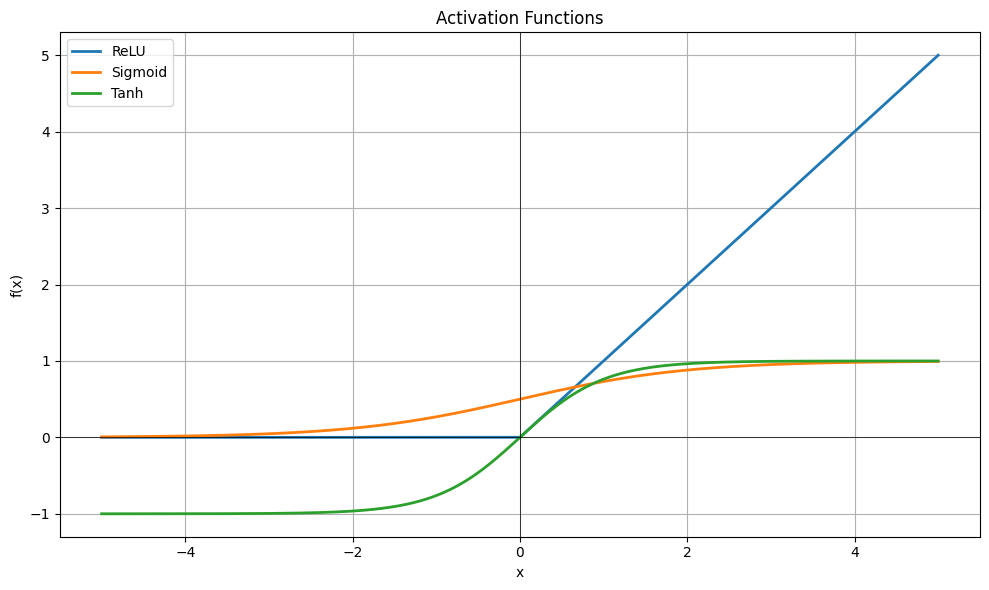

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def relu(z):
    return np.maximum(z, 0)

def sigmoid(z):
    den = 1 + np.exp(-z)
    return 1/den

def tanh(z):
    return np.tanh(z)

x = np.linspace(-5,5,40000)

relu_vect = np.vectorize(relu)
sigmoid_vect = np.vectorize(sigmoid)
tanh_vect = np.vectorize(tanh)

y_relu = relu_vect(x)
y_sigmoid = sigmoid_vect(x)
y_tanh = tanh_vect(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label="ReLU", linewidth=2)
plt.plot(x, y_sigmoid, label="Sigmoid", linewidth=2)
plt.plot(x, y_tanh, label="Tanh", linewidth=2)

plt.title("Activation Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Structure $\phi(wx+b)$ enables learning non-linear models but cannot capture all non-linear curves. By nesting these functions,
we build more expressive models. 

**Suppose:**

$$f_1(x)=\phi(ax+b)$$
$$f_2(z)=\phi(cz+d)$$

Then,

$$y=f_2(f_1(x)) = \phi(c \phi(ax+b)+d)$$

Figure below shows the computational graph of the composite two functions.

![Graph](./images/graph.png)

Below below shows computational graph with 2d input and 2 layers.
![Graph](./images/multi-layer-computational-graph.png)

## 3. Loss Function Optimization With Gradient Descent:



Gradient descent algorithm is widely used to minimize the
loss, including in large language models. 

## Consider:
    
Binary classification problem

Training Dataset: $D$ is $\{(x_i, y_i)\}_{i=1}^{N}$, here:
- $x_i$ is training dataset feature
- $y_i$ indexed from 1 to N, takes 0 or 1

To train a model on these classification problem we can define:

$$y=\sigma(w.x+b)$$

Where, $\mathbf{x} = \left[ x^{(j)} \right]_{j=1}^{D}$ and $\mathbf{w} = \left[ w^{(j)} \right]_{j=1}^{D}$ are D dimensional vector. This model is called **Logistic Regression** commonly used for binary classification problem.

Common choice of function for logistic regression is:

$$\text{loss}(\tilde{y}_i, y_i) \overset{\text{def}}{=} -\left[ y_i \log(\tilde{y}_i) + (1 - y_i)\log(1 - \tilde{y}_i) \right]$$

Its value takes from $- \infty, \infty$ logistic regression always outputs values between 0 and 1. It can serve **either as a standalone model or as the output layer in a larger neural network.**

Loss functions are usually designed to penalize incorrect predictions while re-
warding accurate ones. To see why logistic loss works for logistic regression,
consider two extreme cases:

**1.Perfect Prediction:** When, $y_i=0,\tilde{y}=0$
Then, $$loss(0,0)=[-0.log(0)+(1-0).log(1-0)]=-log(1)=0$$

Here, loss is zero which because prediction matches label.

**2.Opposite Prediction:** When, $y_i=0,\tilde{y}=1$

Then, $$loss(1,0)=[-0.log(1)+(1-0).log(1-1)]=-log(0)=-\infty$$

For entire dataset D, 

$$loss_{D}=\frac{1}{N} \sum_{i = 1}^{N} [y_i log(\tilde{y}) + (1-y_i) log(1- \tilde{y}) ] $$

To simplify this to calculate the gradient descent derivatives:

$$loss(\tilde{y}_i, y_i) = - [ y_i log(\sigma(z_i)) + (1-y_i) log((1-\sigma(z_i)) ]$$


To minimize, $loss(\tilde{y}_i, y_i)$, we calculate the **partial derivatives with respect to each weights: $w^j$ and b**

We can use chain rule because we have composite function as belows:

- **Function 1:** $z_i=wx+b$, a linear function with weight **w** and bias **b**

- **Function 2:** $\tilde{y} = \sigma(z_i) = \frac{1}{1+e^{z_i}}$, sigmoid applied to $z_i$

- **Function 2** $loss(\tilde(y_i),y_i) as defined in above equation $